In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\15 Random forests\Company_Data.csv")

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.skew()

C:\Users\prajw\AppData\Local\Temp\ipykernel_23544\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [5]:
df.kurt()

C:\Users\prajw\AppData\Local\Temp\ipykernel_23544\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [6]:
df.shape

(400, 11)

<AxesSubplot:>

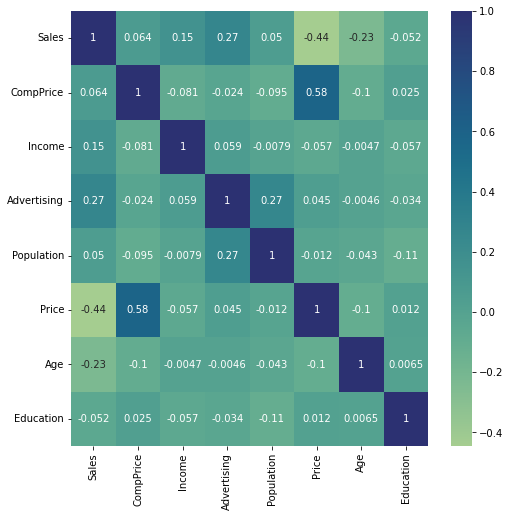

In [7]:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="crest")

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
df1=pd.get_dummies(df,columns=["ShelveLoc","Urban","US"])

In [10]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [11]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [12]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small


In [13]:
pd.DataFrame({"columns":df1.columns})

,columns
0,CompPrice
1,Income
2,Advertising
3,Population
4,Price
5,Age
6,Education
7,ShelveLoc_Bad
8,ShelveLoc_Good
9,ShelveLoc_Medium


In [14]:
'''array=df1.values
x=array[:,:-1]
y=array[:,-1]'''

x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
kfold=KFold(n_splits=8,shuffle=True,random_state=6)

In [17]:
num_trees=200
max_features=3

In [18]:
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [19]:
result=cross_val_score(model,x,y,cv=kfold)

In [20]:
result.mean()

0.7925

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=6)

In [23]:
model=RandomForestClassifier(oob_score=True,n_estimators=num_trees,max_features=max_features)

In [24]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=200, oob_score=True)

In [25]:
model.oob_score_

0.815625

In [26]:
pred_train=model.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [29]:
pred_test=model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.7125

In [31]:
confusion_matrix(y_test,pred_test)

array([[27, 13],
       [10, 30]], dtype=int64)

In [32]:
df_t=pd.DataFrame({"Actual":y_test,"Predicted":pred_test})

In [33]:
df_t

,Actual,Predicted
137,small,small
138,large,large
13,large,large
95,small,small
175,large,small
...,...,...
209,small,small
223,small,small
90,small,small
286,large,large
